# This section analyses individual exogenous datapoints via PCA individually



In [36]:
import pandas as pd
# Imports
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import KernelPCA



from sklearn.model_selection import KFold
from scikeras.wrappers import KerasRegressor
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE

# Load the data from CSV files into DataFrames
zone_data_1A = pd.read_csv('zone_data_1A_clustered.csv', nrows=40000)
zone_data_7 = pd.read_csv('zone_data_7_clustered.csv')
zone_data_6 = pd.read_csv('zone_data_6_clustered.csv')

# Separate zone_data_1A into two different DataFrames based on the cluster assignment
zone_data_1A_top = zone_data_1A[zone_data_1A['Cluster'] == 0]
zone_data_1A_bottom = zone_data_1A[zone_data_1A['Cluster'] == 1]

zone_data_7_top = zone_data_7[zone_data_7['Cluster'] == 0]
zone_data_7 = zone_data_7[zone_data_7['Cluster'] == 1]

zone_data_6_top = zone_data_6[zone_data_6['Cluster'] == 1]
zone_data_6 = zone_data_6[zone_data_6['Cluster'] == 0]

# Copy the data to avoid SettingWithCopyWarning
zone_data_1A_top_sorted = zone_data_1A_top.copy()
zone_data_1A_bottom_sorted = zone_data_1A_bottom.copy()

# Copy the data for zone 6 and zone 7 to avoid SettingWithCopyWarning
zone_data_6_top_sorted = zone_data_6_top.copy()
zone_data_6_bottom_sorted = zone_data_6.copy()

zone_data_7_top_sorted = zone_data_7_top.copy()
zone_data_7_bottom_sorted = zone_data_7.copy()

# Order the data by 'Create_date_ordinal' from lowest to highest
zone_data_1A_top_sorted.sort_values(by='Create_date_ordinal', ascending=True, inplace=True)
zone_data_1A_bottom_sorted.sort_values(by='Create_date_ordinal', ascending=True, inplace=True)

# Order the data by 'Create_date_ordinal' from lowest to highest
zone_data_6_top_sorted.sort_values(by='Create_date_ordinal', ascending=True, inplace=True)
zone_data_6_bottom_sorted.sort_values(by='Create_date_ordinal', ascending=True, inplace=True)

zone_data_7_top_sorted.sort_values(by='Create_date_ordinal', ascending=True, inplace=True)
zone_data_7_bottom_sorted.sort_values(by='Create_date_ordinal', ascending=True, inplace=True)

print(zone_data_1A_top_sorted)




        Status Application Creation Date Approved / Refused Date  \
4920  Recorded                09/04/2009              14/08/2009   
5222  Recorded                23/04/2009              13/05/2009   
8771  Recorded                23/04/2009              13/05/2009   
670   Recorded                23/04/2009              09/06/2009   
7668  Recorded                30/04/2009              13/07/2009   
...        ...                       ...                     ...   
3430  Recorded                02/04/2024              11/04/2024   
3385  Recorded                04/04/2024              11/04/2024   
6748  Recorded                11/04/2024              12/04/2024   
5773  Recorded                11/04/2024              16/04/2024   
3356  Recorded                12/04/2024              16/04/2024   

     Recorded / Rejected Date Water Share ID Water System Source Reliability  \
4920               12/10/2009      WEE****70            Goulburn        High   
5222               10/0

## Function declarations

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

def process_data(file_path, row_thresh_multiplier=0.5):
    # Load the data
    tempData = pd.read_csv(file_path, parse_dates=['Time'], index_col='Time')
    print("Array size:", tempData.shape)
    
    # Drop rows where more than half the columns have missing values
    row_thresh = len(tempData.columns) * row_thresh_multiplier
    tempData = tempData.dropna(axis=0, thresh=row_thresh)
    print("Array size:", tempData.shape)
    
    # Drop any columns with missing values
    tempData = tempData.dropna(axis=1, how='any')
    print("Array size:", tempData.shape)
    
    # Group data by 'Time', calculate the mean, and reset the index
    daily_Data = tempData.groupby(tempData.index).mean().reset_index()
    daily_Data['Time_ordinal'] = pd.to_datetime(daily_Data['Time']).apply(lambda x: x.toordinal())
    
    return daily_Data

def perform_pca(data, columns_to_exclude):
    # Standardize columns excluding specified columns
    columns_to_standardize = [col for col in data.columns[1:] if col not in columns_to_exclude]
    x = StandardScaler().fit_transform(data[columns_to_standardize].values)
    
    # Perform PCA
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])
    
    # Display explained variance
    print("Explained Variance Ratio:", pca.explained_variance_ratio_)
    
    return principalDf, pca.explained_variance_ratio_

def plot_pca(principalDf, explained_variance_ratios, year_values, title, ax):
    pc1_variance_ratio = explained_variance_ratios[0] * 100
    pc2_variance_ratio = explained_variance_ratios[1] * 100
    
    # Plot the results
    scatter = ax.scatter(principalDf['principal component 1'], principalDf['principal component 2'],
                         c=year_values, cmap='viridis', alpha=0.7)
    ax.set_title(title)
    ax.set_xlabel(f'Principal Component 1 ({pc1_variance_ratio:.2f}%)')
    ax.set_ylabel(f'Principal Component 2 ({pc2_variance_ratio:.2f}%)')
    return scatter




Array size: (10227, 402)
Array size: (4281, 402)
Array size: (4281, 7)
Explained Variance Ratio: [0.8716016  0.10198781]
Array size: (7007, 14)
Array size: (1584, 14)
Array size: (1584, 3)
Explained Variance Ratio: [0.71006187 0.26002031]
Array size: (5114, 118)
Array size: (303, 118)
Array size: (303, 29)
Explained Variance Ratio: [0.17750039 0.10966792]
Array size: (10227, 311)
Array size: (5114, 311)
Array size: (5114, 2)
Explained Variance Ratio: [0.57531104 0.42468896]
Array size: (169, 725)
Array size: (169, 725)
Array size: (169, 358)
Explained Variance Ratio: [0.49186328 0.16873703]
Array size: (14000, 1360)
Array size: (5114, 1360)
Array size: (5114, 216)
Explained Variance Ratio: [0.26772685 0.09862906]


/var/folders/d9/x_bnq71n58lbk4_znq_twz6h0000gn/T/ipykernel_6474/4069192297.py:53: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0, 0.08, 1, 1])


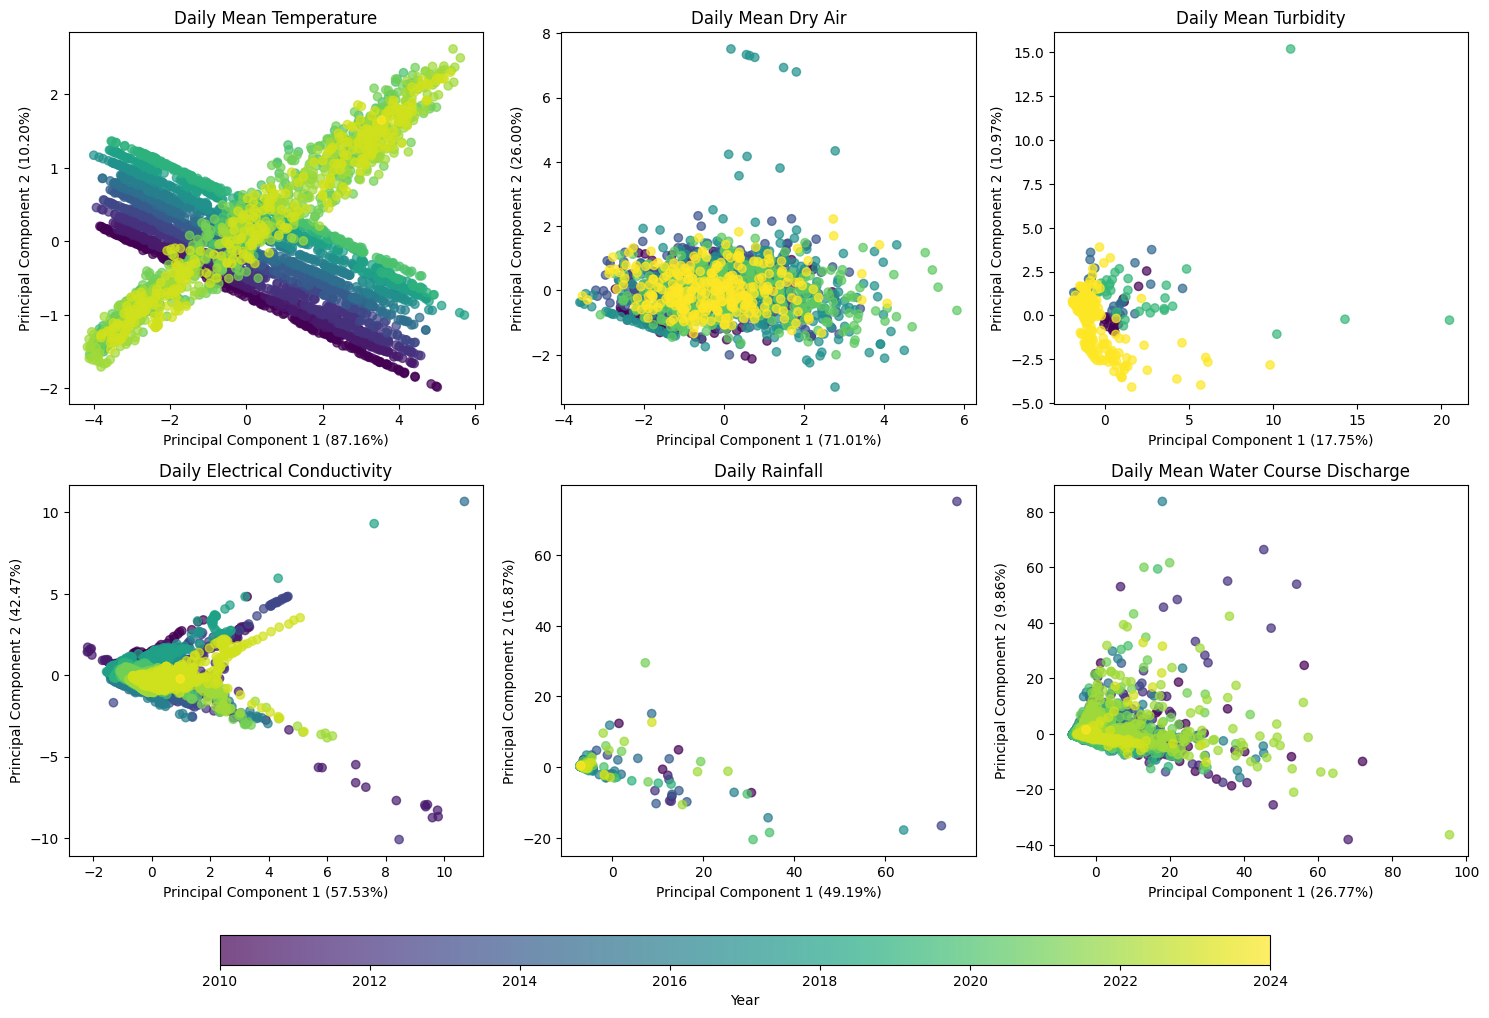

In [38]:

# File path of the data
Plotting_file_paths = [
    {'file_path': '../GET_WATER_DATA_ONLINE/DailyMeanTempData.csv', 'title': 'Daily Mean Temperature', 'row_thresh_multiplier': 0.5},
    {'file_path': '../GET_WATER_DATA_ONLINE/DailyMeanDryAir.csv', 'title': 'Daily Mean Dry Air', 'row_thresh_multiplier': 0.5},
    {'file_path': '../GET_WATER_DATA_ONLINE/DailyMeanTurbidity.csv', 'title': 'Daily Mean Turbidity', 'row_thresh_multiplier': 0.56},
    {'file_path': '../GET_WATER_DATA_ONLINE/DailyEC.csv', 'title': 'Daily Electrical Conductivity', 'row_thresh_multiplier': 0.5},
    {'file_path': '../GET_WATER_DATA_ONLINE/DailyMeanRainfall.csv', 'title': 'Daily Rainfall', 'row_thresh_multiplier': 0.5},
    {'file_path': '../GET_WATER_DATA_ONLINE/DailyMeanWaterCourseDischarge.csv', 'title': 'Daily Mean Water Course Discharge', 'row_thresh_multiplier': 0.5},
    # Add more datasets as needed
]


# Specify the columns to exclude from standardization
columns_to_exclude = ['Status', 'Application Creation Date', 'Approved / Refused Date', 'Recorded / Rejected Date',
                      'Water Share ID', 'Water System Source', 'Reliability', 'Trading Zone Source',
                      'Seller Water Authority', 'Seller Trading Zone Use', 'Buyer Water Authority',
                      'Buyer Trading Zone Use', 'Create_date', 'Create_date_ordinal', 'Cluster', 'Time',
                      'Time_ordinal', 'Price Per ML ($)', 'Volume Traded (ML)']

# Create a figure and axes for subplots
num_plots = len(Plotting_file_paths)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
axes = axes.flatten()

for i, dataset in enumerate(Plotting_file_paths):
    file_path = dataset['file_path']
    title = dataset['title']
    row_thresh_multiplier = dataset['row_thresh_multiplier']
    
    # Process the data
    data = process_data(file_path, row_thresh_multiplier)
    
    # Extract year values from the 'Time' column
    year_values = pd.to_datetime(data['Time']).dt.year
    
    # Perform PCA
    principal_df, explained_variance_ratios = perform_pca(data, columns_to_exclude)
    
    # Plot the PCA results
    scatter = plot_pca(principal_df, explained_variance_ratios, year_values, title, axes[i])


# Remove unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

cbar_ax = fig.add_axes([0.15, 0.03, 0.7, 0.03])
cbar = fig.colorbar(scatter, cax=cbar_ax, orientation='horizontal', label='Year')

# Adjust the spacing between subplots
fig.tight_layout(rect=[0, 0.08, 1, 1])

# Show the plot
plt.show()

# Save the figure to a file
fig.savefig('../imgs/PCA_EXOG_individual.png', bbox_inches='tight', dpi=300)
